## Keras Image Application - Ensemble 학습

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101

In [3]:
from google.colab import files
up = files.upload()

Saving animals.zip to animals.zip


In [6]:
!unzip animals.zip -d animals

Archive:  animals.zip
  inflating: animals/bear.jpg        
  inflating: animals/crocodile.jpg   
  inflating: animals/dolphin.jpg     
  inflating: animals/eagle.jpg       
  inflating: animals/elephant.jpg    
  inflating: animals/hawk.jpg        
  inflating: animals/lion.jpg        
  inflating: animals/penguin.jpg     
  inflating: animals/shark.jpg       
  inflating: animals/sparrow.jpg     


- 모델 로딩

In [7]:
vgg16 = VGG16()
vgg19 = VGG19()
resnet50 = ResNet50()
resnet101 = ResNet101()

179648224/179648224 [==============================] - 1s 0us/step


- 이미지 예측

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

In [12]:
results = []
for fname in glob('animals/*.jpg'):
    name = fname.split('/')[1].split('.')[0]
    img = Image.open(fname).resize((224,224))
    yhat_v16 = vgg16.predict(np.array(img).reshape(-1,224,224,3), verbose=0)
    yhat_v19 = vgg19.predict(np.array(img).reshape(-1,224,224,3), verbose=0)
    yhat_r50 = resnet50.predict(np.array(img).reshape(-1,224,224,3), verbose=0)
    yhat_r101 = resnet101.predict(np.array(img).reshape(-1,224,224,3), verbose=0)
    yhat_ens = (yhat_v16 + yhat_v19 + yhat_r50 + yhat_r101) / 4

    pred_v16 = decode_predictions(yhat_v16)[0][0][1]
    pred_v19 = decode_predictions(yhat_v19)[0][0][1]
    pred_r50 = decode_predictions(yhat_r50)[0][0][1]
    pred_r101 = decode_predictions(yhat_r101)[0][0][1]
    pred_ens = decode_predictions(yhat_ens)[0][0][1]

    results.append({'name':name, 'VGG16':pred_v16, 'VGG19':pred_v19,
                    'ResNet50':pred_r50, 'ResNet101':pred_r101, 'Ensemble':pred_ens})

- 결과 확인

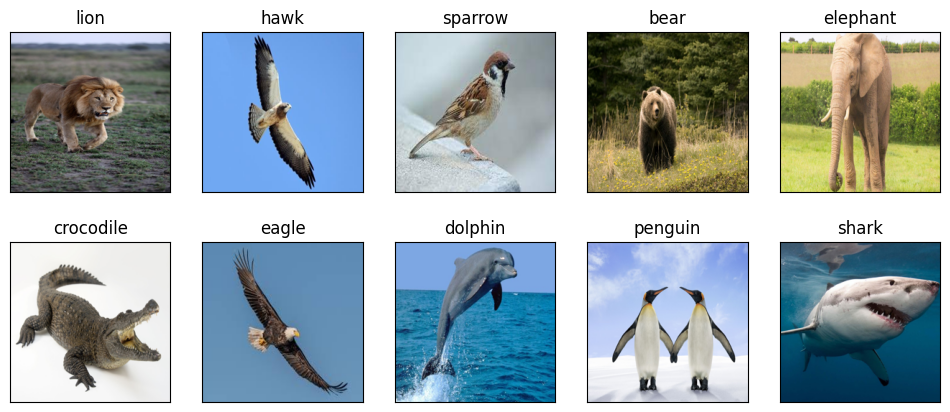

In [13]:
plt.figure(figsize=(12,5))
for i, fname in enumerate(glob('animals/*.jpg')):
    plt.subplot(2, 5, i+1)
    plt.imshow(Image.open(fname).resize((224,224)))
    plt.title(fname.split('/')[1].split('.')[0])
    plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
df = pd.DataFrame(results)
df

,name,VGG16,VGG19,ResNet50,ResNet101,Ensemble
0,lion,lion,malamute,Lhasa,miniature_schnauzer,lion
1,hawk,kite,kite,kite,kite,kite
2,sparrow,jay,jay,jay,jay,jay
3,bear,ice_bear,ice_bear,ice_bear,ice_bear,ice_bear
4,elephant,tusker,tusker,cardigan,cardigan,cardigan
5,crocodile,agama,frilled_lizard,American_alligator,triceratops,agama
6,eagle,kite,kite,kite,kite,kite
7,dolphin,Weimaraner,hammerhead,Weimaraner,Weimaraner,Weimaraner
8,penguin,king_penguin,king_penguin,king_penguin,king_penguin,king_penguin
9,shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark


- Image의 중앙부를 정사각형으로 잘라내어 224x224로 만들어준 경우

In [15]:
up = files.upload()

Saving image_util.py to image_util.py


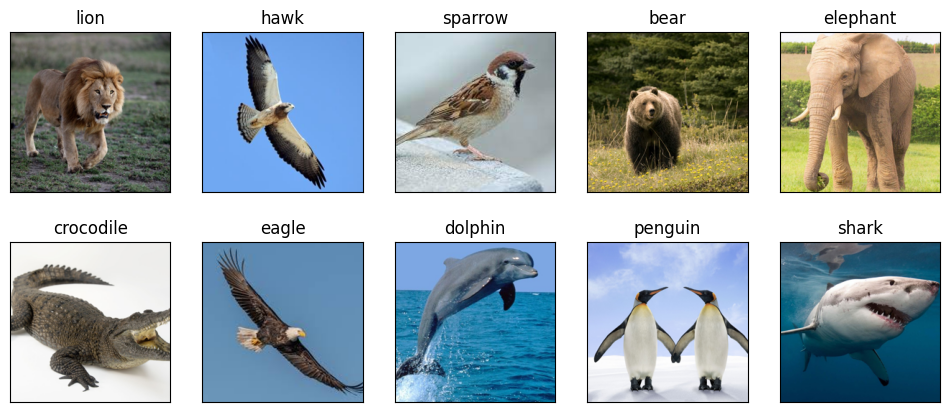

In [16]:
from image_util import center_image

plt.figure(figsize=(12,5))
for i, fname in enumerate(glob('animals/*.jpg')):
    plt.subplot(2, 5, i+1)
    plt.imshow(center_image(Image.open(fname), src_format='Pillow', dst_format='Pillow'))
    plt.title(fname.split('/')[1].split('.')[0])
    plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
results = []
for fname in glob('animals/*.jpg'):
    name = fname.split('/')[1].split('.')[0]
    img = center_image(Image.open(fname), src_format='Pillow')
    yhat_v16 = vgg16.predict(img.reshape(-1,224,224,3), verbose=0)
    yhat_v19 = vgg19.predict(img.reshape(-1,224,224,3), verbose=0)
    yhat_r50 = resnet50.predict(img.reshape(-1,224,224,3), verbose=0)
    yhat_r101 = resnet101.predict(img.reshape(-1,224,224,3), verbose=0)
    yhat_ens = (yhat_v16 + yhat_v19 + yhat_r50 + yhat_r101) / 4

    pred_v16 = decode_predictions(yhat_v16)[0][0][1]
    pred_v19 = decode_predictions(yhat_v19)[0][0][1]
    pred_r50 = decode_predictions(yhat_r50)[0][0][1]
    pred_r101 = decode_predictions(yhat_r101)[0][0][1]
    pred_ens = decode_predictions(yhat_ens)[0][0][1]

    results.append({'name':name, 'VGG16':pred_v16, 'VGG19':pred_v19,
                    'ResNet50':pred_r50, 'ResNet101':pred_r101, 'Ensemble':pred_ens})

In [18]:
pd.DataFrame(results)

,name,VGG16,VGG19,ResNet50,ResNet101,Ensemble
0,lion,lion,lion,lion,lion,lion
1,hawk,kite,kite,screw,kite,kite
2,sparrow,quail,jay,chickadee,jay,jay
3,bear,brown_bear,ice_bear,ice_bear,brown_bear,ice_bear
4,elephant,African_elephant,African_elephant,African_elephant,African_elephant,African_elephant
5,crocodile,agama,American_alligator,American_alligator,American_alligator,American_alligator
6,eagle,kite,kite,kite,kite,kite
7,dolphin,dugong,hammerhead,hammerhead,hammerhead,hammerhead
8,penguin,king_penguin,king_penguin,king_penguin,king_penguin,king_penguin
9,shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark
